# 02 - Modeling
In this notebook, we build and evaluate forecasting models for retail sales.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import joblib
from pathlib import Path

# Load cleaned data
df = pd.read_csv('../data/raw/retail_sales.csv', parse_dates=['Date'], index_col='Date')
df = df.asfreq('MS')  # monthly start frequency
df.head()

,Sales
Date,
2019-01-01,222.45
2019-02-01,227.10
2019-03-01,246.10
2019-04-01,258.40
2019-05-01,224.25


In [4]:
# Train-test split (last 6 months as test)
train = df.iloc[:-6]
test = df.iloc[-6:]

train.shape, test.shape

((42, 1), (6, 1))

In [5]:
# Baseline model (Naive Forecast)
naive_forecast = [train['Sales'].iloc[-1]] * len(test)
naive_mse = mean_squared_error(test['Sales'], naive_forecast)
naive_mae = mean_absolute_error(test['Sales'], naive_forecast)
print('Naive Forecast MSE:', naive_mse)
print('Naive Forecast MAE:', naive_mae)

Naive Forecast MSE: 807.1873000000008
Naive Forecast MAE: 25.916666666666686


In [6]:
# Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
hw_forecast = fitted_model.forecast(len(test))

hw_mse = mean_squared_error(test['Sales'], hw_forecast)
hw_mae = mean_absolute_error(test['Sales'], hw_forecast)
print('Holt-Winters MSE:', hw_mse)
print('Holt-Winters MAE:', hw_mae)

Holt-Winters MSE: 374.3788228731062
Holt-Winters MAE: 17.30868800731447


In [7]:
# Compare results
results = pd.DataFrame({
    'Model': ['Naive', 'Holt-Winters'],
    'MSE': [naive_mse, hw_mse],
    'MAE': [naive_mae, hw_mae]
})
results

,Model,MSE,MAE
0,Naive,807.187300,25.916667
1,Holt-Winters,374.378823,17.308688


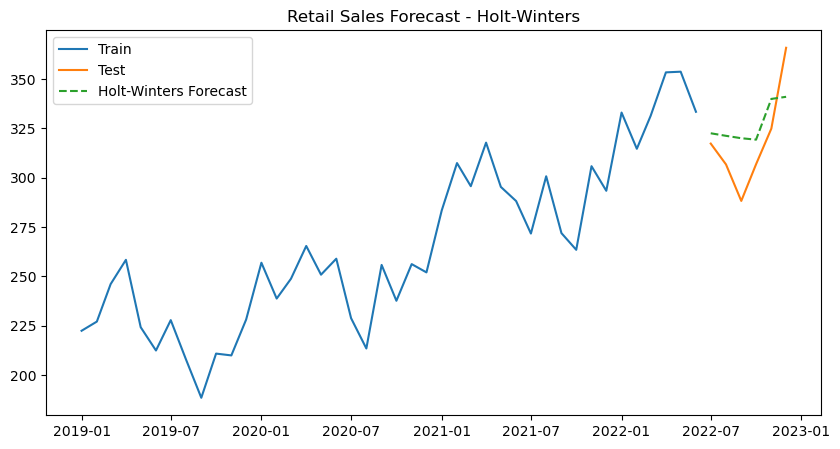

In [8]:
# Visualization
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.legend()
plt.title('Retail Sales Forecast - Holt-Winters')
plt.show()

In [9]:
# Save best model
Path('../models').mkdir(parents=True, exist_ok=True)
joblib.dump(fitted_model, '../models/final_model.pkl')
print('Model saved!')

Model saved!
